<a href="https://colab.research.google.com/github/Burak-Akca/Image-Classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tqdm
import cv2
import tensorflow as tf
from keras.optimizers import SGD

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,RandomTranslation,RandomBrightness,RandomContrast, Conv2D,Input, MaxPooling2D, Flatten, GlobalAveragePooling2D,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"burakaka","key":"af42cc7be927f74f1611c84c6bbe7b44"}'}

In [2]:
import os
import shutil

# Kaggle dizinini oluştur
os.makedirs('~/.kaggle', exist_ok=True)

# Dosyayı uygun dizine taşı
shutil.move('kaggle.json', '~/.kaggle/kaggle.json')

# Dosya izinlerini ayarla
os.chmod('~/.kaggle/kaggle.json', 600)

In [4]:
!kaggle datasets download -d hayder17/breast-cancer-detection


Dataset URL: https://www.kaggle.com/datasets/hayder17/breast-cancer-detection
License(s): DbCL-1.0
100% 87.0M/87.2M [00:06<00:00, 17.2MB/s]
100% 87.2M/87.2M [00:06<00:00, 14.1MB/s]


In [5]:
import zipfile

In [6]:
zip_ref=zipfile.ZipFile("breast-cancer-detection.zip")

In [7]:
zip_ref.extractall()

In [8]:
zip_ref.close()

In [69]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/train",
    image_size=(240,240),
    batch_size=32,

)

Found 2372 files belonging to 2 classes.


In [68]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/valid",

    image_size=(240,240),
    batch_size=32
)

Found 675 files belonging to 2 classes.


In [67]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/test",
    image_size=(240,240),
    batch_size=32,

)

Found 336 files belonging to 2 classes.


In [51]:
test_ds.class_names

['0', '1']

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',         # İzlemek istediğiniz metrik
    patience=6,                 # Sabırlı kalınacak epoch sayısı
    restore_best_weights=True    # En iyi ağırlıkları geri yükle
)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras',           # Modelin kaydedileceği dosya
    monitor='val_accuracy',        # İzlenecek metrik
    save_best_only=True,       # Sadece en iyi model kaydedilsin
    mode='max',                # Kayıt için en düşük değeri izleyin
    verbose=1                  # Kayıt işlemi hakkında bilgi yazdırma
)

In [24]:

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.1),

])


In [54]:

model = Sequential()

# Input Layer
model.add(Conv2D(filters = 8, kernel_size= 3, padding='same',
                 activation = 'relu' ,input_shape =[256,256,3]))

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(filters = 16, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))


model.add(Conv2D(filters = 32, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size =(3,3)))

# Flatten Layer
model.add(Flatten())


# Fully Connected Layer
# Tam bağlantılı katmanlar


model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# Output Layer

model.add(Dense(1, activation = 'sigmoid'))
  # Çıkış katmanı
optimizer = SGD(learning_rate=0.1)  # Öğrenme oranını 0.0001 olarak ayarladık

# Modeli derle
model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)                   │ (None, 256, 256, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 126, 126, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 40, 40, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 715,025 (2.73 MB)

 Trainable params: 715,025 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(train_ds, epochs = 25, validation_data=val_ds, verbose= 1)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.6373 - loss: 17.6735 - val_accuracy: 0.6637 - val_loss: 0.7836
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.6926 - loss: 0.6193 - val_accuracy: 0.6681 - val_loss: 0.6331
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.7065 - loss: 0.5886 - val_accuracy: 0.6696 - val_loss: 0.6844
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.7326 - loss: 0.5526 - val_accuracy: 0.6622 - val_loss: 0.6515
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.7443 - loss: 0.5240 - val_accuracy: 0.6711 - val_loss: 0.6497
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.7747 - loss: 0.4802 - val_accuracy: 0.6696 - val_loss: 0.8309
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7996 - loss: 0.4643 - val_accuracy: 0.6222 - val_loss: 0.9127
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8098 - loss: 0.4221 - val_accuracy: 0.59

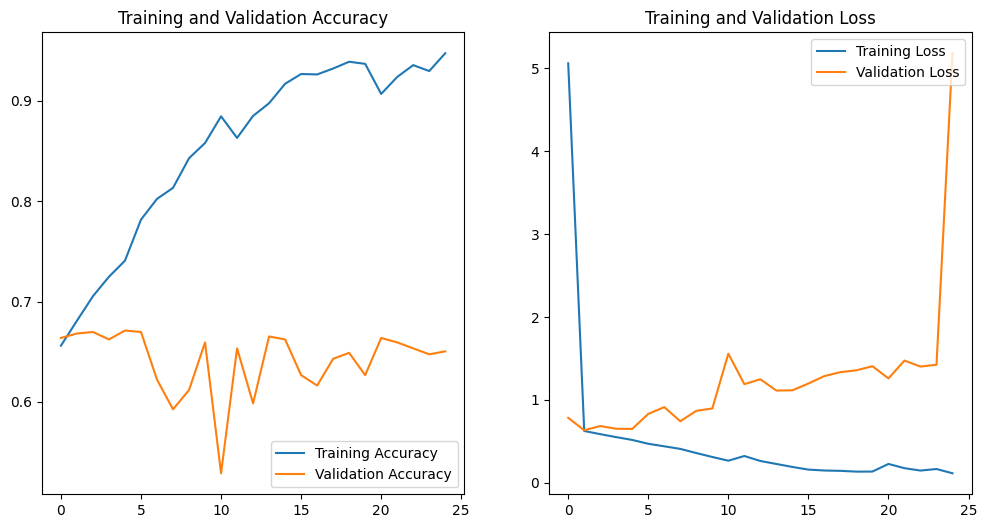

In [56]:
import matplotlib.pyplot as plt

# Eğitimin geçmişinden (history) kayıp ve doğruluk verilerini alın
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Doğruluk grafiği
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [57]:
#Transfer Learning

In [58]:
from keras.applications.vgg19 import VGG19
from keras.models import Model

vgg19 = VGG19()
vgg19.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
base_model = VGG19(weights='imagenet',include_top=False, input_shape=(240, 240, 3))


In [77]:
for layer in base_model.layers:
    layer.trainable = False

In [78]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [83]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [81]:
history = model.fit(train_ds, epochs = 25, validation_data=val_ds, verbose= 1)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 367ms/step - accuracy: 0.5801 - loss: 8.1418 - val_accuracy: 0.6667 - val_loss: 0.7371
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 215ms/step - accuracy: 0.6843 - loss: 0.6594 - val_accuracy: 0.6593 - val_loss: 0.6559
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - accuracy: 0.7013 - loss: 0.5964 - val_accuracy: 0.6696 - val_loss: 0.6259
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 221ms/step - accuracy: 0.6946 - loss: 0.5808 - val_accuracy: 0.6667 - val_loss: 0.6330
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.6871 - loss: 0.5462 - val_accuracy: 0.6593 - val_loss: 0.6233
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.7123 - loss: 0.5268 - val_accuracy: 0.6578 - val_loss: 0.6502
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.7112 - loss: 0.5022 - val_accuracy: 0.6756 - val_loss: 0.6446
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.6995 - loss: 0.4810 - val_accu

In [82]:
for layer in base_model.layers[-4:]:  # Fine Tuning
    layer.trainable = True


In [87]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

In [88]:
history = model.fit(train_ds, epochs = 25, validation_data=val_ds, verbose= 1)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 318ms/step - accuracy: 0.6333 - loss: 2.8904 - val_accuracy: 0.6637 - val_loss: 0.6723
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - accuracy: 0.6784 - loss: 0.6933 - val_accuracy: 0.6637 - val_loss: 0.6511
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.6691 - loss: 0.6465 - val_accuracy: 0.6637 - val_loss: 0.6429
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - accuracy: 0.6721 - loss: 0.6382 - val_accuracy: 0.6637 - val_loss: 0.6400
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - accuracy: 0.6645 - loss: 0.6386 - val_accuracy: 0.6637 - val_loss: 0.6390
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - accuracy: 0.6681 - loss: 0.6389 - val_accuracy: 0.6637 - val_loss: 0.6388
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 253ms/step - accuracy: 0.6685 - loss: 0.6356 - val_accuracy: 0.6637 - val_loss: 0.6387
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - accuracy: 0.6715 - loss: 0.6333 - val_accu

KeyboardInterrupt: 